# (outlined) North Atlantic Hurricanes

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_FOLDER = Path("..") / "data"
DATA_FILEPATH = DATA_FOLDER / "hurricanes.csv"
# Execute on cloud platform? (e.g. colab), try this path instead
# DATA_FILEPATH = "https://raw.githubusercontent.com/jeepchinnawat/edumat-book/main/data/hurricanes.csv"

hurricanes = pd.read_csv(DATA_FILEPATH)
hurricanes

,RowNames,Number,Name,Year,Type,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt
0,1,430,NOTNAMED,1944,1,30.2,-76.1,32.1,-74.8,35.1,-69.2,80
1,2,432,NOTNAMED,1944,0,25.6,-74.9,31.0,-78.1,32.6,-78.2,80
2,3,433,NOTNAMED,1944,0,14.2,-65.2,16.6,-72.2,20.6,-88.5,105
3,4,436,NOTNAMED,1944,0,20.8,-58.0,26.3,-72.3,42.1,-71.5,120
4,5,437,NOTNAMED,1944,0,20.0,-84.2,20.6,-84.9,19.1,-93.9,70
...,...,...,...,...,...,...,...,...,...,...,...,...
332,333,1227,GORDON,2000,1,25.2,-85.4,26.1,-84.9,28.0,-83.8,70
333,334,1229,ISAAC,2000,0,14.3,-33.2,26.6,-54.2,39.7,-47.9,120
334,335,1230,JOYCE,2000,0,12.4,-38.8,12.2,-42.5,10.5,-48.6,80
335,336,1231,KEITH,2000,0,17.9,-86.4,17.9,-87.2,22.6,-97.9,120


## Introductory Data Inspection

In [2]:
hurricanes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337 entries, 0 to 336
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RowNames  337 non-null    int64  
 1   Number    337 non-null    int64  
 2   Name      337 non-null    object 
 3   Year      337 non-null    int64  
 4   Type      337 non-null    int64  
 5   FirstLat  337 non-null    float64
 6   FirstLon  337 non-null    float64
 7   MaxLat    337 non-null    float64
 8   MaxLon    337 non-null    float64
 9   LastLat   337 non-null    float64
 10  LastLon   337 non-null    float64
 11  MaxInt    337 non-null    int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 31.7+ KB


In [3]:
features = ['FirstLat','FirstLon','MaxLat','MaxLon','LastLat','LastLon','MaxInt']
label = ['Type']

In [4]:
hurricanes[features].describe()

,FirstLat,FirstLon,MaxLat,MaxLon,LastLat,LastLon,MaxInt
count,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000,337.000000
mean,23.437982,-65.568546,27.198220,-68.650742,34.550148,-64.895252,94.572700
std,7.592829,17.665280,7.724416,16.875719,10.175473,22.074126,23.287442
min,10.300000,-96.700000,10.300000,-98.400000,10.000000,-99.200000,65.000000
25%,16.600000,-80.000000,21.700000,-82.500000,28.700000,-83.500000,75.000000
50%,23.300000,-65.300000,27.300000,-68.400000,35.500000,-65.600000,90.000000
75%,28.700000,-53.400000,33.000000,-56.800000,42.100000,-48.500000,110.000000
max,46.000000,-23.000000,48.000000,-7.500000,61.100000,-5.000000,165.000000


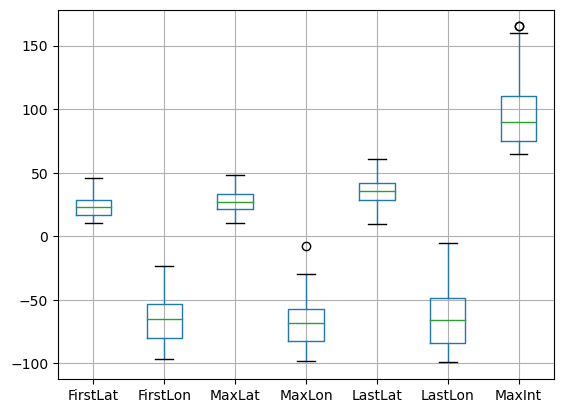

In [5]:
hurricanes[features].boxplot()
plt.show()

## Feature Selection

### Univariate Selection

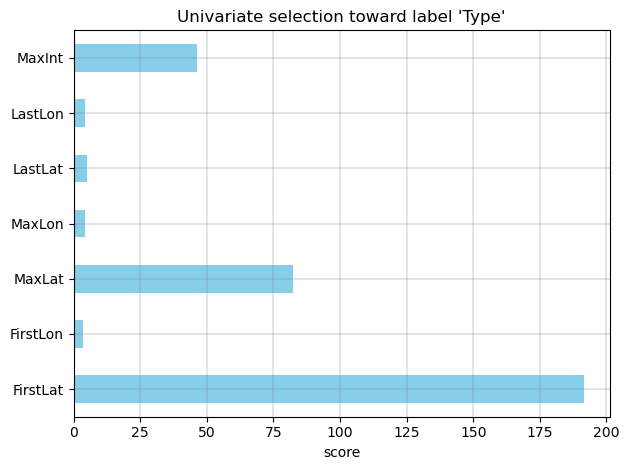

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=2)
selector.fit(hurricanes[features], hurricanes[label[0]])
scores = selector.scores_

features_scores = pd.Series(scores, index=features)

fig, ax = plt.subplots()
features_scores.plot.barh(ax=ax, color='skyblue')
ax.grid(True, which='both', color='grey', linewidth=0.3)
ax.set_title("Univariate selection toward label 'Type'")
ax.set_xlabel("score")
fig.tight_layout()
plt.show()

### Random Forest's Feature Importance

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameters for GridSearch
param_grid = {
'n_estimators': [10, 20, 30, 40],
'max_depth': [2,4,6, 8],
'min_samples_split': [2, 4],
    'max_features': [1,2,4,7]
}

# rf = RandomForestClassifier(random_state=20, n_jobs=2,min_samples_leaf=1)
# # Grid search with cross-validation
# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid)
# cv_rf.fit(X_train, y_train)
# print(f"Best parameters: {cv_rf.best_params_}")

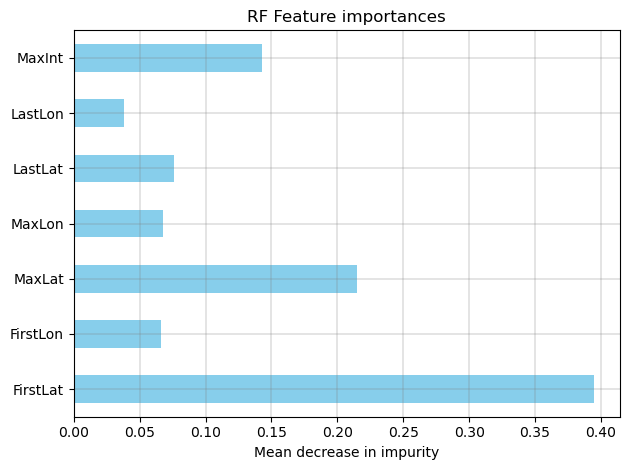

In [8]:
rf = RandomForestClassifier(random_state=0, n_jobs=2, min_samples_leaf=1,
                            max_depth=4, max_features=2, min_samples_split=2, n_estimators=40)
rf.fit(hurricanes[features], hurricanes[label[0]])

importances = rf.feature_importances_
features_scores = pd.Series(importances, index=features)

fig, ax = plt.subplots()
features_scores.plot.barh(ax=ax, color='skyblue')
ax.grid(True, which='both', color='grey', linewidth=0.3)
ax.set_title("RF Feature importances")
ax.set_xlabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [9]:
selected_features = ["FirstLat", 'MaxLat']

## Stratified Data Splitting

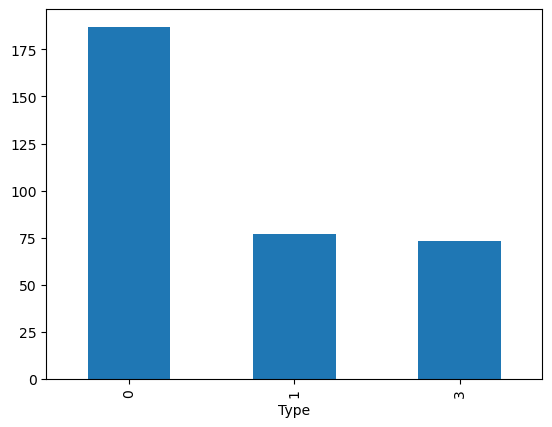

In [10]:
hurricanes.groupby('Type').Type.count().plot(kind='bar')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

X,y = hurricanes[selected_features].copy(), hurricanes[label[0]].copy()
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=.7, random_state=0, stratify=y)

## Classification Model

In [12]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_train, y_train)

0.7191489361702128

In [13]:
svm.score(X_test, y_test)

0.6862745098039216

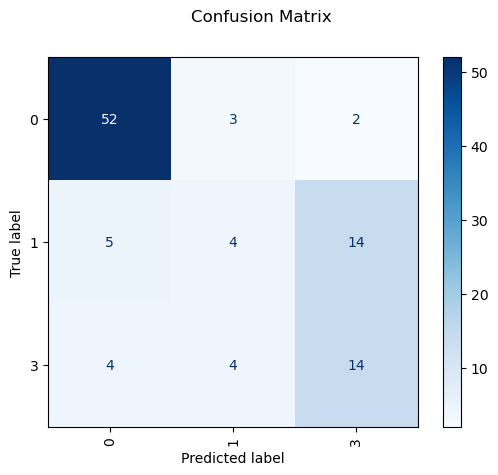

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred = svm.predict(X_test)
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, xticks_rotation = 'vertical',
                                               cmap=plt.cm.Blues)
disp.figure_.suptitle("Confusion Matrix")

plt.show()

### Transform to binary classification

In [15]:
tropical = hurricanes.copy()

# merge type 3 into type 1 for binary classification problem (tropical hurricane or not?)
tropical.loc[tropical['Type'] == 3, 'Type'] = 1
# check for binary type
tropical['Type'].unique()

array([1, 0])

In [16]:
X,y = tropical[selected_features].copy(), tropical[label[0]].copy()
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, train_size=.7, random_state=0, stratify=y)

In [17]:
import matplotlib.patches

def plot_2DClassifier(X, f, y, classifier, title):
    # create a predicted mesh
    s = 0.2
    f1, f2 = f[0], f[1]
    x_min, x_max = X[f1].min() - 1, X[f1].max() + 1
    y_min, y_max = X[f2].min() - 1, X[f2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, s), np.arange(y_min, y_max, s))
    df = {f1: xx.ravel(),f2: yy.ravel()}
    xy = pd.DataFrame(df)
    Z = classifier.predict(xy)
    fig, ax = plt.subplots()
    
    # Fill the plot with predicted mesh
    levels, categories = pd.factorize(Z, sort=True)
    levels = levels.reshape(xx.shape)
    ax.contourf(xx, yy, levels, cmap=plt.cm.coolwarm, alpha=0.3)

    # data scatter plot
    n_classes = classifier.classes_.shape[0]
    levels, categories = pd.factorize(y, sort=True)
    handles = [matplotlib.patches.Patch(color=plt.cm.coolwarm.resampled(n_classes)(i), label=c) for i, c in enumerate(categories)]
    ax.scatter(X[f1], X[f2], c=levels, cmap=plt.cm.coolwarm, edgecolors='black')
    ax.set_xlabel(f1)
    ax.set_ylabel(f2)
    ax.set_title(title)
    ax.legend(handles=handles)
    plt.show()

### SVM's hyperparameters (interactive w/ ipywidgets)

In [22]:
from ipywidgets import interact, fixed
import ipywidgets as widgets

def svc_interact(C, gamma, svc):
    status_widget.value = 'Calculating...'
    
    svc.set_params(**{'C': C, 'gamma': gamma})
    svc.fit(X_train, y_train)
    plot_2DClassifier(X_train, selected_features, y_train, svc, "SVM w/ training set")
    
    status_widget.value = f'Test set accuracy : {svc.score(X_test, y_test)}'

C_widget = widgets.FloatLogSlider(value=10., min=-3, max=2, base=10, step=0.2, description='C:', disabled=False, continuous_update=False, orientation='horizontal', readout=True, readout_format='.3f')
gamma_widget = widgets.FloatLogSlider(value=0.01, min=-3, max=2, base=10, step=0.2, description='Gamma:', disabled=False, continuous_update=False, orientation='horizontal', readout=True, readout_format='.3f')
status_widget = widgets.Label(value='')

bi_svm = SVC()
interact(svc_interact, C=C_widget, gamma=gamma_widget, svc=fixed(bi_svm))
display(status_widget)

interactive(children=(FloatLogSlider(value=10.0, continuous_update=False, description='C:', max=2.0, min=-3.0,…

Label(value='Test set accuracy : 0.8333333333333334')

## Feature uncertainty experiment
- Assume above the decision boundary(model) as a model a data annotator uses to label trocical hurricanes
- features X also as true measurements
- Re-classify X with the model to have truely annotated labels (wrt. an annotator)

(Re-classify the features with the model to have a perfectly separable dataset and then add Gaussian noise the the features to see the outcome.)

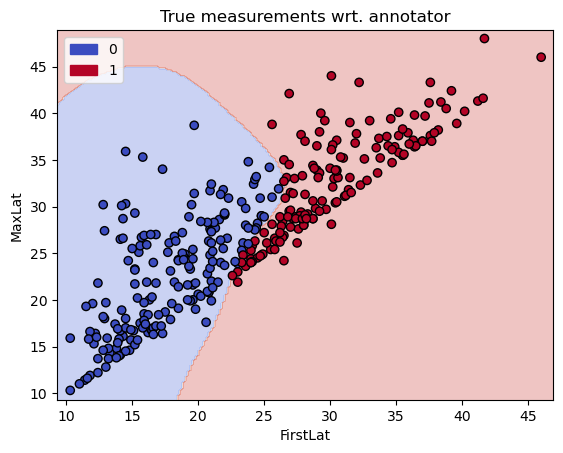

In [32]:
true_y = bi_svm.predict(X)

plot_2DClassifier(X, selected_features, true_y, bi_svm, "True measurements wrt. annotator")

### Add Gaussian noise to features
(Expected: Affecting data points in the vicinity of decision boundaries)

In [35]:
def noise_interact(sd):
    status_widget.value = 'Calculating...'
    noisy_X = X + np.random.normal(loc=0.0, scale=sd, size=X.shape)
    
    plot_2DClassifier(noisy_X, selected_features, true_y, bi_svm, "Noisy measurement wrt. annotator")

    noisy_pred = bi_svm.predict(noisy_X)
    status_widget.value = f"Noisy inputs accuracy: {bi_svm.score(noisy_X, true_y)}"

sd_widget = widgets.FloatSlider(value=1., min=0.1, max=5., step=0.1, description='SD :',
    disabled=False, continuous_update=False, orientation='horizontal', readout=True, readout_format='.1f'
)
status_widget = widgets.Label(value='')

interact(noise_interact, sd=sd_widget)
display(status_widget)

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='SD :', max=5.0, min=0.1, re…

Label(value='Noisy inputs accuracy: 0.9406528189910979')